In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
cc = pd.read_csv("../data/cleaned-data/cc.csv")[["Continent_Name", "Three_Letter_Country_Code", "pop2010"]]

In [143]:
ghg = pd.read_csv("../data/cleaned-data/ghg_clean.csv")
ghg = ghg.merge(cc, left_on="COU", right_on="Three_Letter_Country_Code")
ghg

,COU,Country,Pollutant,VAR,Year,Value,Continent_Name,Three_Letter_Country_Code,pop2010
0,AUS,Australia,Greenhouse gases,TOTAL,1990,425624.307,Oceania,AUS,22031750.0
1,AUS,Australia,Greenhouse gases,TOTAL,1991,425686.445,Oceania,AUS,22031750.0
2,AUS,Australia,Greenhouse gases,TOTAL,1992,429473.085,Oceania,AUS,22031750.0
3,AUS,Australia,Greenhouse gases,TOTAL,1993,430381.731,Oceania,AUS,22031750.0
4,AUS,Australia,Greenhouse gases,TOTAL,1994,430848.498,Oceania,AUS,22031750.0
...,...,...,...,...,...,...,...,...,...
12953,MCO,Monaco,Carbon dioxide,TOTAL,2016,74.584,Europe,MCO,35609.0
12954,MCO,Monaco,Carbon dioxide,TOTAL,2017,72.987,Europe,MCO,35609.0
12955,MCO,Monaco,Carbon dioxide,TOTAL,2018,74.692,Europe,MCO,35609.0
12956,MCO,Monaco,Carbon dioxide,TOTAL,2019,71.372,Europe,MCO,35609.0


In [144]:
ghg["VAR"].unique()

array(['TOTAL', 'INDEX_1990', 'GHG_CAP', 'GHG_GDP'], dtype=object)

In [145]:
ghg["Pollutant"].unique()

array(['Greenhouse gases', 'Carbon dioxide', 'Methane'], dtype=object)

In [146]:
ghg["Continent_Name"].unique()

array(['Oceania', 'Europe', 'North America', 'Asia', 'South America',
       'Africa'], dtype=object)

In [147]:
colormap = {'Oceania': 'tab:cyan', 'Europe': 'tab:blue', 'North America': 'tab:orange', 
            'Asia': 'tab:green', 'South America': 'tab:red', 'Africa': 'tab:purple'}

In [148]:
def plot_total_emission(var="TOTAL", pollutant="Greenhouse gases"):
    ghg_subtable = ghg[ghg["VAR"]==var]
    plt.figure(figsize=(9,6))
    for country in ghg_subtable["COU"].unique():
        country_table = ghg_subtable[(ghg_subtable["COU"] == country) & (ghg_subtable["Pollutant"] == pollutant)]
        continent = country_table["Continent_Name"].iloc[0]
        plt.plot(country_table["Year"], country_table["Value"],
                 color=colormap[continent], label=continent)
    plt.ylabel("Tonnes of CO2 equivalent, Thousands")
    plt.title(f"Total {pollutant} emissions (1990-2020)")
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

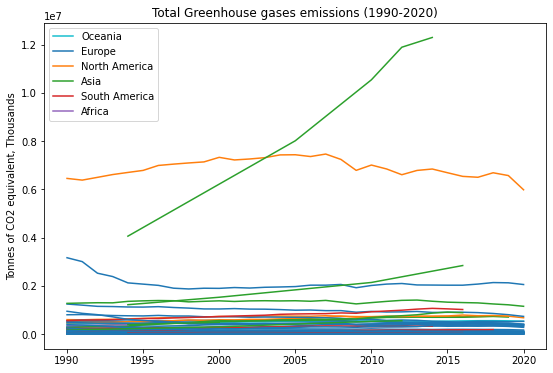

In [149]:
plot_total_emission()

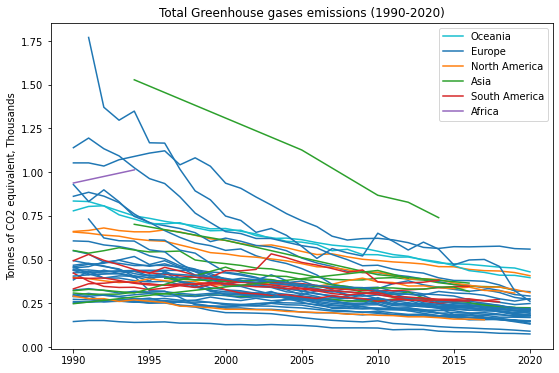

In [150]:
plot_total_emission(var="GHG_GDP")

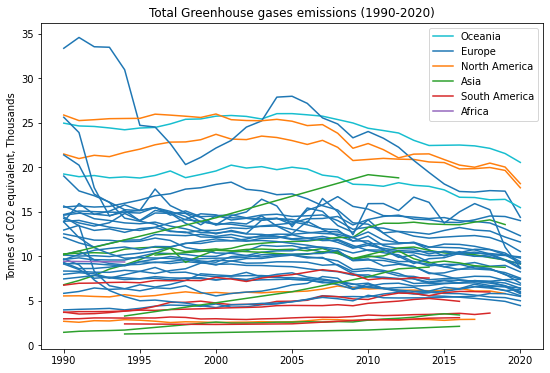

In [151]:
plot_total_emission(var="GHG_CAP")

Text(0, 0.5, 'Tonnes of CO2 equivalent (Base=1990)')

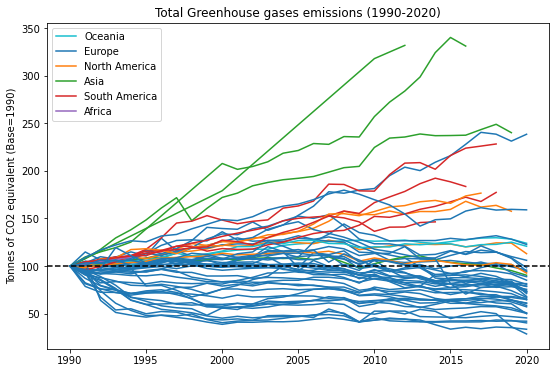

In [152]:
plot_total_emission(var = "INDEX_1990")
plt.axhline(y = 100, color = 'black', linestyle = 'dashed')
plt.ylabel("Tonnes of CO2 equivalent (Base=1990)")

In [153]:
pat = pd.read_csv("../data/cleaned-data/pat_clean.csv")
pat = pat.merge(cc, left_on="COU", right_on="Three_Letter_Country_Code")
pat

,COU,Inventor country,Technology domain,Year,Value,Continent_Name,Three_Letter_Country_Code,pop2010
0,AUS,Australia,Environment-related technologies,1995,134.83,Oceania,AUS,22031750.0
1,AUS,Australia,Environment-related technologies,2000,203.42,Oceania,AUS,22031750.0
2,AUS,Australia,Environment-related technologies,2005,263.75,Oceania,AUS,22031750.0
3,AUS,Australia,Environment-related technologies,2010,313.85,Oceania,AUS,22031750.0
4,AUS,Australia,Environment-related technologies,2011,305.68,Oceania,AUS,22031750.0
...,...,...,...,...,...,...,...,...
2439,MNE,Montenegro,Environment-related technologies,2013,1.00,Europe,MNE,619428.0
2440,MNE,Montenegro,Environment-related technologies,2015,0.50,Europe,MNE,619428.0
2441,MNE,Montenegro,Environment-related technologies,2017,0.50,Europe,MNE,619428.0
2442,BEN,Benin,Environment-related technologies,2012,1.00,Africa,BEN,9199254.0


In [162]:
pat["Technology domain"].unique()

array(['Environment-related technologies', 'Air pollution abatement'],
      dtype=object)

In [160]:
def plot_env_tech(domain="Environment-related technologies"):
    pat_subtable = pat[pat["Technology domain"]==domain]
    plt.figure(figsize=(9,6))
    for country in pat_subtable["COU"].unique():
        country_table = pat_subtable[pat_subtable["COU"] == country]
        continent = country_table["Continent_Name"].iloc[0]
        plt.plot(country_table["Year"], country_table["Value"]/country_table["pop2010"]*1000000,
                 color=colormap[continent], label=continent)
    plt.ylabel("Number of patents per million persons")
    plt.title(f"Environment technology development")
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

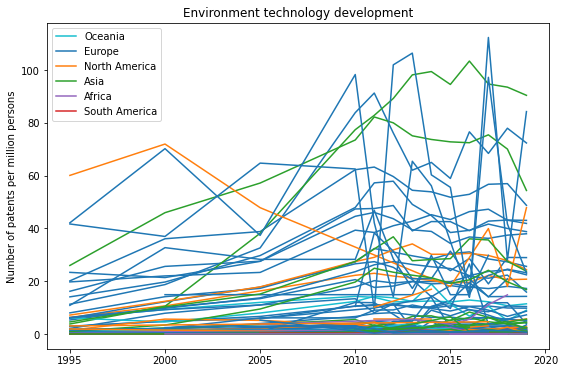

In [161]:
plot_env_tech()

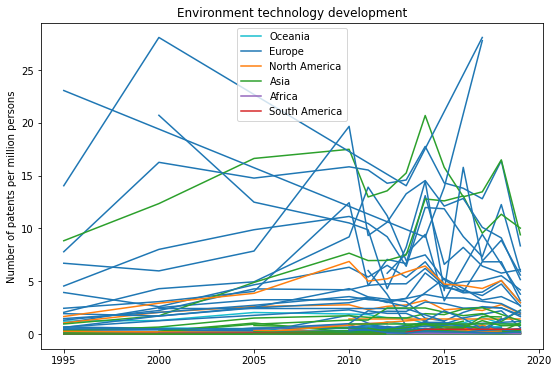

In [163]:
plot_env_tech("Air pollution abatement")

In [197]:
ghg_chg_start = ghg[(ghg["VAR"]=="INDEX_1990") & (ghg["Pollutant"]=="Greenhouse gases")].groupby(["COU"]).first()["Value"]
ghg_chg_end = ghg[(ghg["VAR"]=="INDEX_1990") & (ghg["Pollutant"]=="Greenhouse gases")].groupby(["COU"]).last()["Value"]
ghg_chg = ghg_chg_end - ghg_chg_start
ghg_chg

COU
ARG     46.455
AUS     23.991
AUT     -6.160
BEL    -26.944
BGR    -49.993
BLR    -38.706
BRA     83.610
CAN     13.053
CHE    -19.182
CHL    128.234
COL     77.394
CRI     76.630
CYP     59.089
CZE    -42.734
DEU    -41.322
DNK    -39.160
ESP     -5.295
EST    -71.236
FIN    -32.809
FRA    -27.006
GBR    -49.091
GRC    -27.661
HRV    -24.323
HUN    -33.751
IDN    231.021
IRL      6.105
ISL     22.729
ITA    -26.670
JPN     -9.590
KAZ    -11.082
KOR    140.115
LIE    -21.366
LTU    -57.831
LUX    -28.808
LVA    -59.616
MCO    -31.831
MEX     57.597
MLT    -18.378
NLD    -25.356
NOR     -4.198
NZL     20.831
POL    -20.979
PRT     -1.562
ROU    -54.363
RUS    -35.135
SAU    231.740
SVK    -49.570
SVN    -14.772
SWE    -35.213
TUR    138.439
UKR    -66.288
USA     -7.315
ZAF      9.353
Name: Value, dtype: float64

In [198]:
pat_avg = pat.groupby("COU")[["Value", "pop2010"]].mean()
pat_avg["Value_PC"] = pat_avg["Value"] / pat_avg["pop2010"] * 1000000
pat_avg

,Value,pop2010,Value_PC
COU,,,
AFG,0.585000,29185511.0,0.020044
AGO,0.500000,23356247.0,0.021408
ALB,2.377500,2913021.0,0.816163
AND,0.691250,84454.0,8.184929
ARE,4.959565,8549998.0,0.580066
...,...,...,...
VUT,0.500000,236216.0,2.116707
YEM,0.582500,23154854.0,0.025157
ZAF,23.361538,51216967.0,0.456129


In [199]:
pat_avg.sort_values("Value_PC", ascending=False)

,Value,pop2010,Value_PC
COU,,,
LIE,1.670588,35996.0,46.410385
MCO,1.641765,35609.0,46.105330
KOR,2062.170385,49554112.0,41.614516
VGB,1.117500,27796.0,40.203626
JPN,5145.225769,128070000.0,40.175106
...,...,...,...
ETH,1.067500,87639962.0,0.012181
BGD,1.630625,147575433.0,0.011049
MMR,0.433333,50600827.0,0.008564


In [200]:
emission_tech = pat_avg.merge(ghg_chg, left_index=True, right_index=True)
emission_tech = emission_tech.merge(cc[["Continent_Name", "Three_Letter_Country_Code"]], left_index=True, right_on="Three_Letter_Country_Code")
emission_tech = emission_tech.drop("Three_Letter_Country_Code", axis=1)
emission_tech = emission_tech.rename(columns={"Value_y": "GHG_chg"})

emission_tech

,Value_x,pop2010,Value_PC,GHG_chg,Continent_Name
9,6.142857,40788453.0,0.150603,46.455,South America
10,143.626923,22031750.0,6.519088,23.991,Oceania
11,200.528462,8363404.0,23.976895,-6.160,Europe
18,113.545769,10895586.0,10.421263,-26.944,Europe
29,7.736818,7395599.0,1.046138,-49.993,Europe
32,3.328333,9483836.0,0.350948,-38.706,Europe
24,47.862800,195713637.0,0.244555,83.610,South America
35,359.948462,34004889.0,10.585197,13.053,North America
192,160.521154,7824909.0,20.514124,-19.182,Europe
41,15.263636,17062531.0,0.894570,128.234,South America


Text(0, 0.5, 'Percent Change in greenhouse gases emissions (1990-2020)')

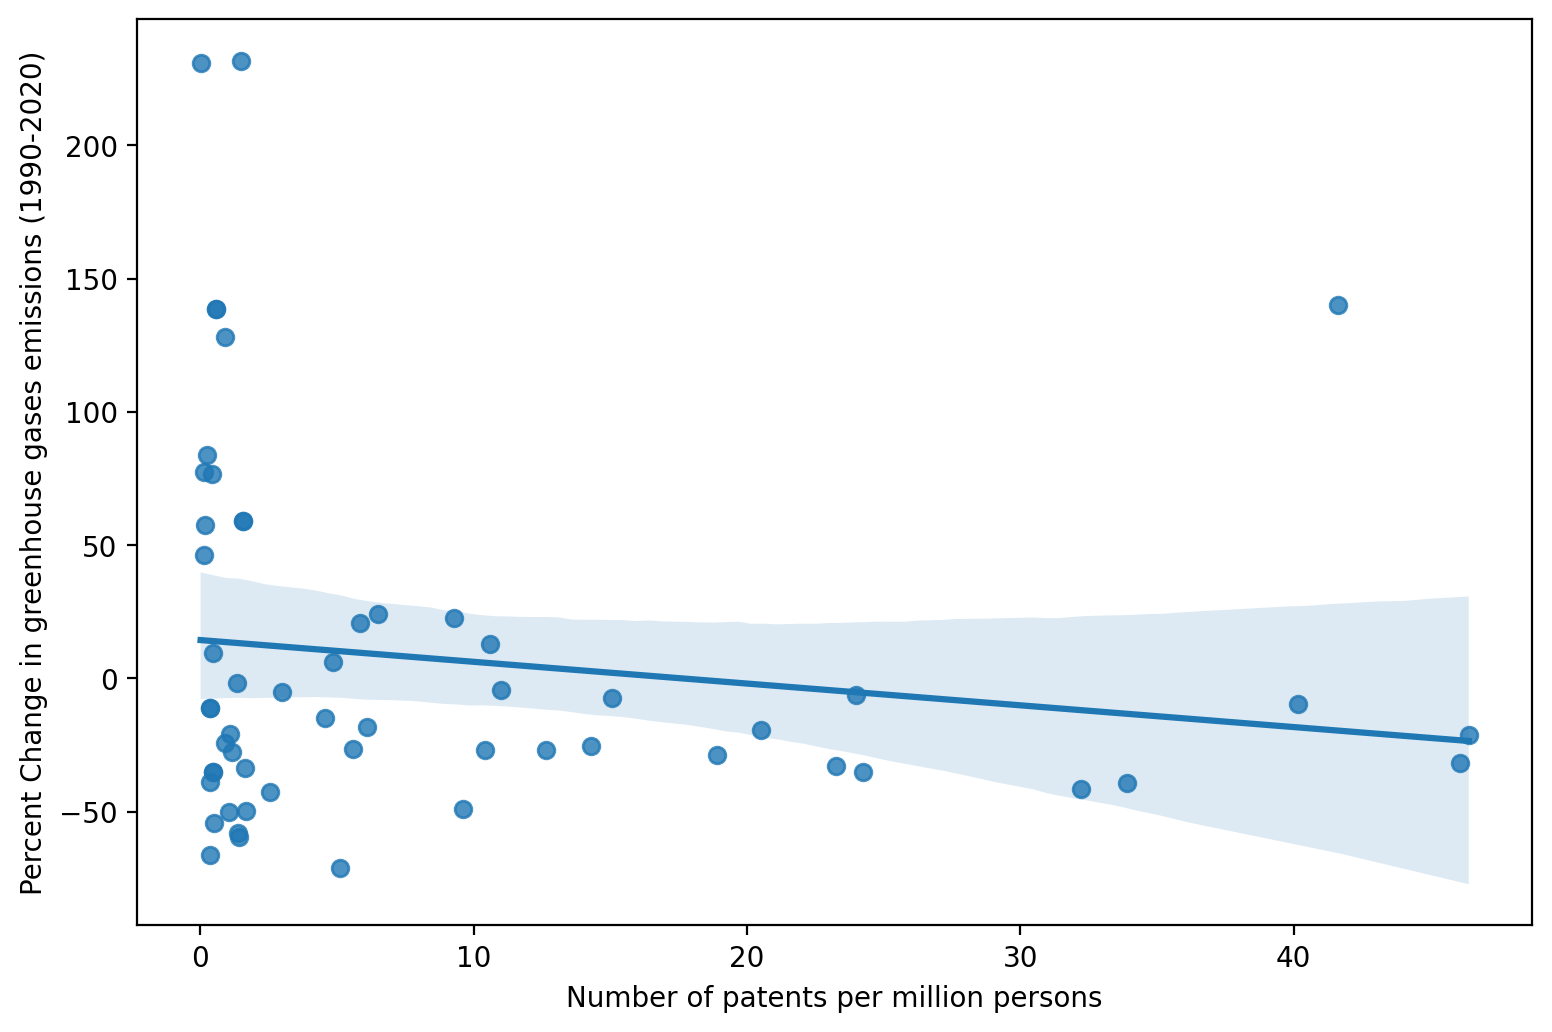

In [216]:
plt.figure(figsize=(9,6),dpi=200)
sns.regplot(data=emission_tech, x='Value_PC', y='GHG_chg')
plt.xlabel("Number of patents per million persons")
plt.ylabel("Percent Change in greenhouse gases emissions (1990-2020)")

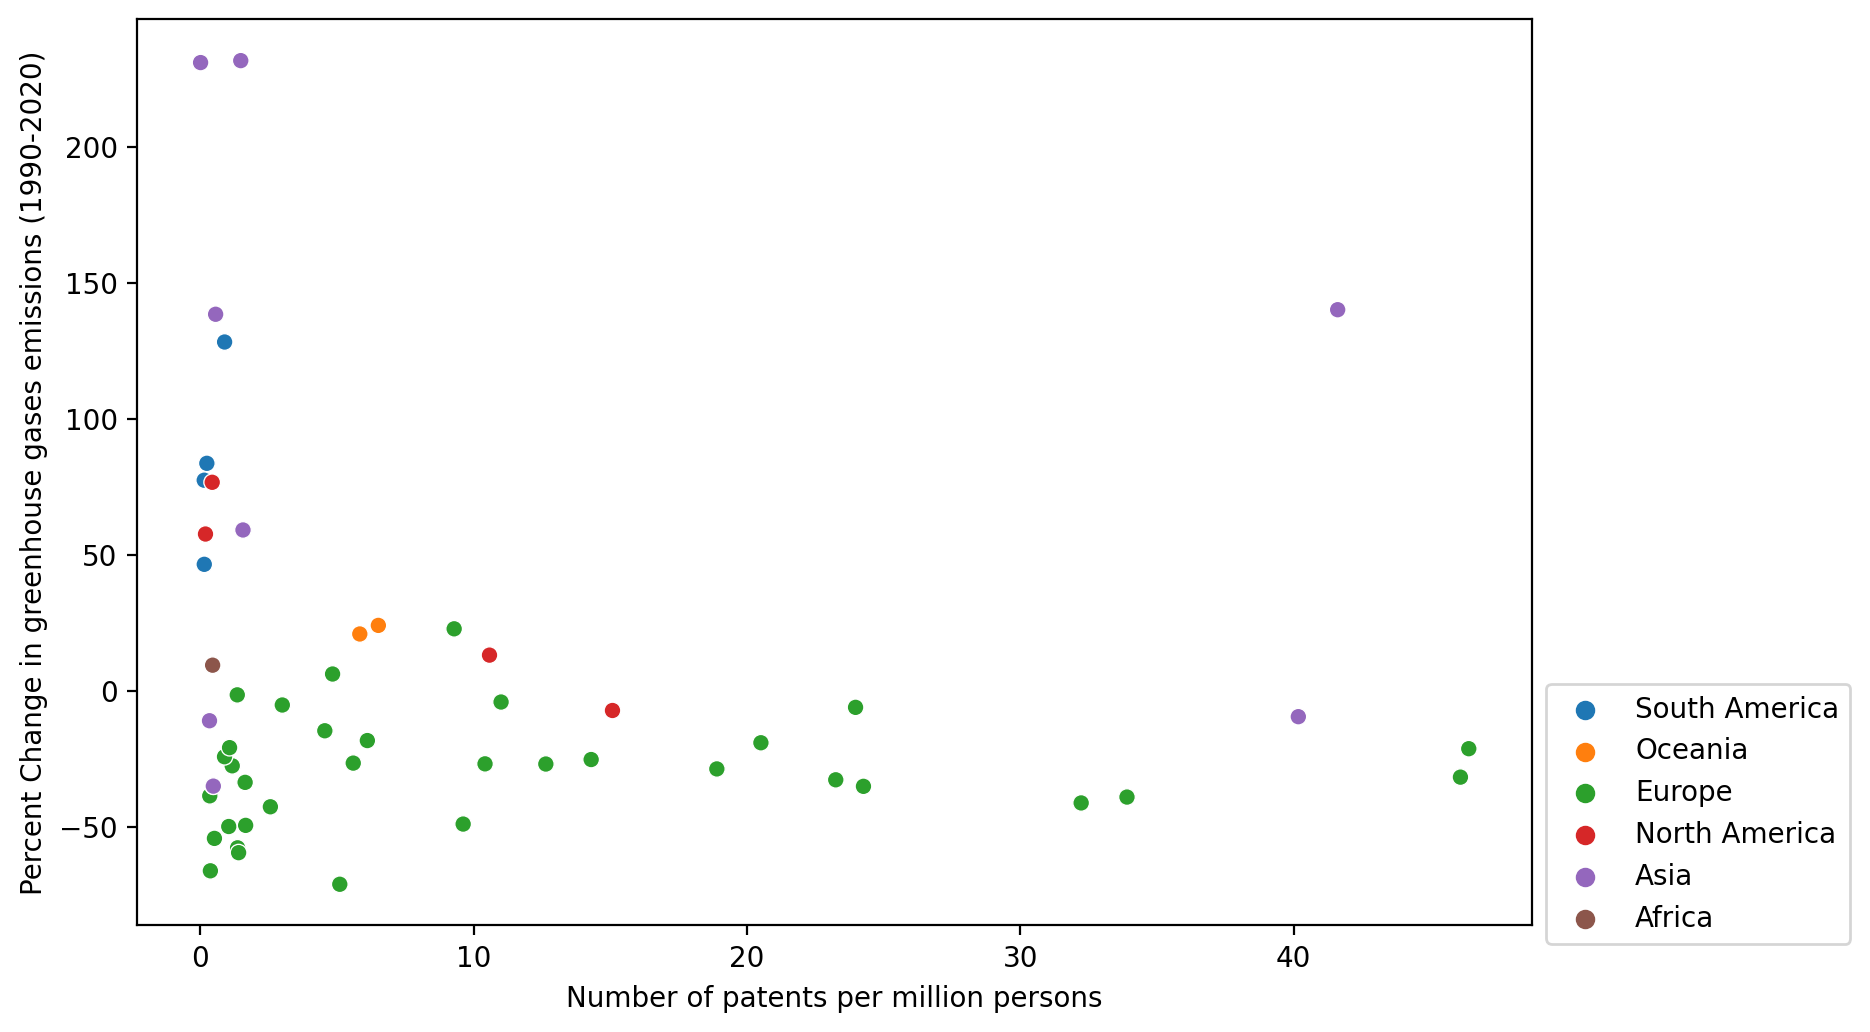

In [215]:
emission_tech_no_outliers = emission_tech[emission_tech["GHG_chg"]>-100]
plt.figure(figsize=(9,6),dpi=200)
sns.scatterplot(data=emission_tech_no_outliers, x='Value_PC', y='GHG_chg', hue='Continent_Name')
plt.xlabel("Number of patents per million persons")
plt.ylabel("Percent Change in greenhouse gases emissions (1990-2020)")
plt.legend(loc=(1.01, -0.02))